In [1]:
import matplotlib.pyplot as plt
import os
import sys
sys.path.append("../")
import nrv

## Nerve creation

In [2]:
outer_d = 5 # mm
nerve_d = 500 # um
nerve_l = 5000 # um

fasc1_d = 200 # um
fasc1_y = -100
fasc1_z = 0

fasc2_d = 100 # um
fasc2_y = 100
fasc2_z = 0

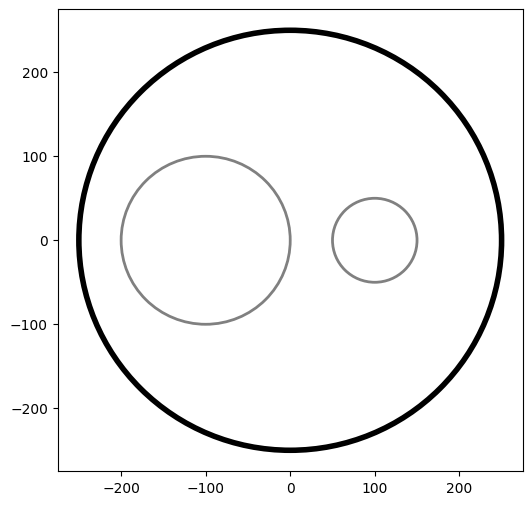

In [3]:
nerve = nrv.nerve(length=nerve_l, diameter=nerve_d, Outer_D=outer_d)

fascicle_1 = nrv.fascicle(diameter=fasc1_d,ID=1)      #we can add diameter here / no need to call define_circular_contour (not tested)
fascicle_2 = nrv.fascicle(diameter=fasc2_d, ID=2)

nerve.add_fascicle(fascicle=fascicle_1, y=fasc1_y, z=fasc1_z)
nerve.add_fascicle(fascicle=fascicle_2, y=fasc2_y, z=fasc2_z)

fig, ax = plt.subplots(1, 1, figsize=(6,6))
nerve.plot(ax)

## Add axon population

NRV INFO: On 100 axons to generate, there are 30 Myelinated and 70 Unmyelinated
NRV INFO: Axon packing initiated. This might take a while...


100%|██████████| 20000/20000 [00:03<00:00, 6575.66it/s]


NRV INFO: Packing done!
NRV INFO: On 100 axons to generate, there are 30 Myelinated and 70 Unmyelinated
NRV INFO: Axon packing initiated. This might take a while...


100%|██████████| 20000/20000 [00:02<00:00, 6840.36it/s]


NRV INFO: Packing done!
NRV WARNING: 13 outlier axons discarded.


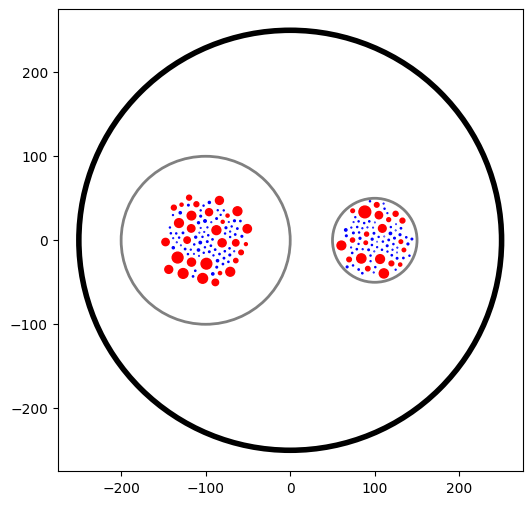

In [4]:
n_ax1 = 100
axons_diameters, axons_type, M_diam_list, U_diam_list = nrv.create_axon_population(n_ax1, percent_unmyel=0.7, M_stat="Ochoa_M", U_stat="Ochoa_U",)
fascicle_1.fill_with_population(axons_diameters, axons_type, delta=5)

n_ax1 = 100
axons_diameters, axons_type, M_diam_list, U_diam_list = nrv.create_axon_population(n_ax1, percent_unmyel=0.7, M_stat="Ochoa_M", U_stat="Ochoa_U",)
fascicle_2.fill_with_population(axons_diameters, axons_type, delta=5)

fig, ax = plt.subplots(1, 1, figsize=(6,6))
nerve.plot(ax)


# blabla

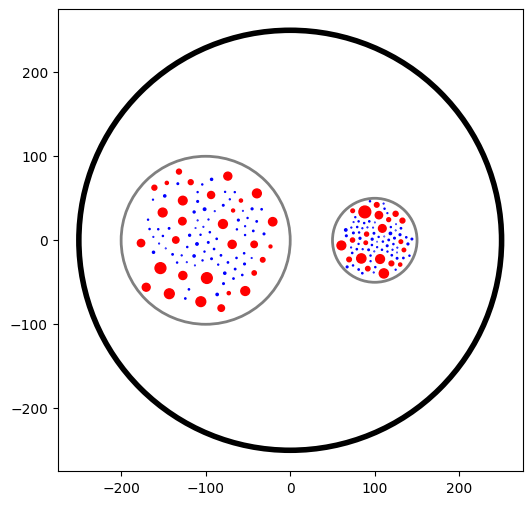

In [5]:
fascicle_1.fit_population_to_size(delta = 1)        #else set True in fill_with_population - Note: Pb with "barycenter"
fig, ax = plt.subplots(1, 1, figsize=(6,6))     
nerve.plot(ax)

## adding electrodes 

In [6]:
life_d = 25
life_length = 1000
life_x_offset = (nerve_l-life_length)/2

life_y_c_0 = 0
life_z_c_0 = 100
life_y_c_1 = fasc1_y
life_z_c_1 = fasc1_z
life_y_c_2 = fasc2_y
life_z_c_2 = fasc2_z

dummy_stim = nrv.stimulus()
dummy_stim.pulse(0, 0.1, 1)

# LIFE in neither of the two fascicles
extra_stim = nrv.FEM_stimulation()

elec_0 = nrv.LIFE_electrode("LIFE", life_d, life_length, life_x_offset, life_y_c_0, life_z_c_0)
extra_stim.add_electrode(elec_0, dummy_stim)

# LIFE in the fascicle 1
elec_1 = nrv.LIFE_electrode("LIFE", life_d, life_length, life_x_offset, life_y_c_1, life_z_c_1)
extra_stim.add_electrode(elec_1, dummy_stim)

# LIFE in the fascicle 2
elec_2 = nrv.LIFE_electrode("LIFE", life_d, life_length, life_x_offset, life_y_c_2, life_z_c_2)
extra_stim.add_electrode(elec_2, dummy_stim)

nerve.attach_extracellular_stimulation(extra_stim)


NRV INFO: From Fascicle 1: Electrode/Axons overlap, 5 axons will be removed from the fascicle
NRV INFO: 100 axons remaining
NRV INFO: From Fascicle 2: Electrode/Axons overlap, 11 axons will be removed from the fascicle
NRV INFO: 87 axons remaining


Let's see how our nerve now looks like:

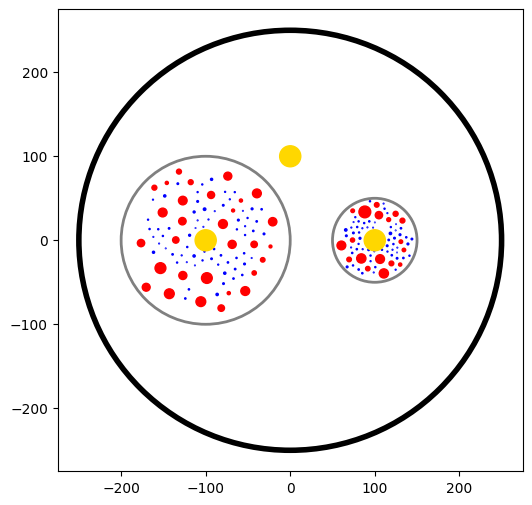

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
nerve.plot(ax)

## Alright now it's time to run some real simulations!

In [8]:
nerve.save_results = False
nerve.return_parameters_only = False
results = nerve.simulate(t_sim=1,postproc_script = "AP_detection")#, save_path='./', postproc_script="default", )

NRV INFO: Starting nerve simulation
NRV INFO: ...computing electrodes footprint
NRV INFO: Mesh properties:
NRV INFO: Number of processes : 3
NRV INFO: Number of entities : 63
NRV INFO: Number of nodes : 20844
NRV INFO: Number of elements : 146893
NRV INFO: Static/Quasi-Static electrical current problem
NRV INFO: FEN4NRV: setup the bilinear form
NRV INFO: FEN4NRV: setup the linear form
NRV INFO: FEN4NRV: solving electrical potential
NRV INFO: FEN4NRV: solved in 26.791662216186523 s
NRV INFO: Static/Quasi-Static electrical current problem
NRV INFO: FEN4NRV: solving electrical potential
NRV INFO: FEN4NRV: solved in 47.55071210861206 s
NRV INFO: Static/Quasi-Static electrical current problem
NRV INFO: FEN4NRV: solving electrical potential
NRV INFO: FEN4NRV: solved in 70.38981032371521 s
NRV INFO: ...simulating fascicle 1
NRV INFO: ...simulating fascicle 2
NRV INFO: ...Done!


In [9]:
results.save(True)

{'__NRVObject__': True,
 'nrv_type': 'nerve_results',
 't_sim': 1,
 'record_V_mem': True,
 'record_I_mem': False,
 'record_I_ions': False,
 'record_particles': False,
 'record_g_mem': False,
 'record_g_ions': False,
 'loaded_footprints': True,
 'dt': 0.001,
 'save_path': [],
 'verbose': False,
 'postproc_script': 'AP_detection',
 'return_parameters_only': False,
 'save_results': False,
 'type': 'Circular',
 'L': 5000,
 'D': 500,
 'y_grav_center': 0,
 'z_grav_center': 0,
 'Outer_D': 5,
 'ID': 0,
 'fascicles_IDs': [1, 2],
 'fascicles': {1: {'__NRVObject__': True,
   'nrv_type': 'fascicle',
   't_sim': 20.0,
   'record_V_mem': True,
   'record_I_mem': False,
   'record_I_ions': False,
   'record_particles': False,
   'record_g_mem': False,
   'record_g_ions': False,
   'loaded_footprints': True,
   'dt': 0.001,
   'save_path': [],
   'verbose': False,
   'postproc_script': 'default',
   'return_parameters_only': True,
   'save_results': True,
   'config_filename': [],
   'type': None,
   